In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# generating syntehtic data
def generate_data(n_samples=500):
    np.random.seed(1)
    X1 = np.random.randn(n_samples // 2, 2) + np.array([2, 2])
    X2 = np.random.randn(n_samples // 2, 2) + np.array([-2, -2])
    X = np.vstack((X1, X2))
    y = np.array([0] * (n_samples // 2) + [1] * (n_samples // 2)).reshape(-1, 1)
    return X, y

X, y = generate_data()

In [3]:
## Activation function and derivatives
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivatives(z):
    return sigmoid(z) * (1 - sigmoid(z))


def relu(z):
    return np.maximum(0,z)

def relu_derivative(z):
    return (z > 0).astype(float)

In [4]:
# loss function
def compute_loss(y, y_hat):
    epsilon = 1e-15
    y_hat = np.clip(y_hat, epsilon, 1 - epsilon)
    return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))


In [5]:
## neural network
class NeuralNetwork:
    def __init__(self, input_size=2, hidden_size=4, lr=0.1, epochs=1000):
        self.lr = lr
        self.epochs = epochs

        # initializing weights and loss
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, 1)
        self.b2 = np.zeros((1, 1))
        self.losses = []
    
    def forward(self, X):
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = relu(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = sigmoid(self.Z2)
        return self.A2
    
    def backward(self, X, y, output):
        m = X.shape[0]
        dZ2 = output - y
        dW2 = (1/m) * np.dot(self.A1.T, dZ2)
        db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)

        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * relu_derivative(self.Z1)
        dW1 = (1/m) * np.dot(X.T, dZ1)
        db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)

        # gradient descent 
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2

    def train(self, X, y):
        for i in range(self.epochs):
            output = self.forward(X)
            loss = compute_loss(y, output)
            self.losses.append(loss)
            self.backward(X, y, output)
            if i % 100 == 0:
                print(f"Epoch {i}, Loss: {loss:.4f}")

    def predict(self, X):
        return self.forward(X) >= 0.5


In [7]:
# training the model

nn = NeuralNetwork(lr=0.1, epochs=1000)
nn.train(X,y)


Epoch 0, Loss: 1.7957
Epoch 100, Loss: 0.0537
Epoch 200, Loss: 0.0220
Epoch 300, Loss: 0.0150
Epoch 400, Loss: 0.0123
Epoch 500, Loss: 0.0109
Epoch 600, Loss: 0.0100
Epoch 700, Loss: 0.0088
Epoch 800, Loss: 0.0080
Epoch 900, Loss: 0.0074


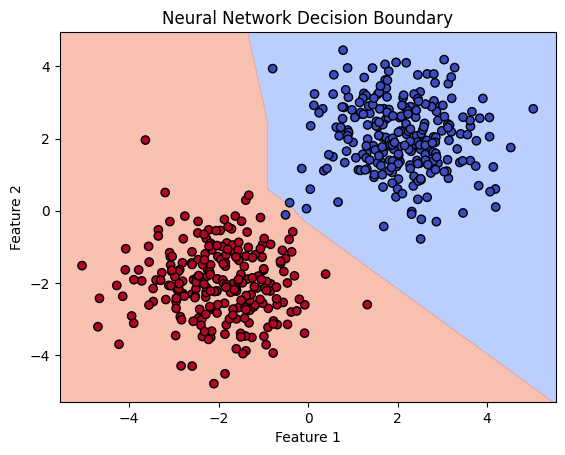

In [8]:
## plotting decision boundries
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = model.forward(grid).reshape(xx.shape)

    plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], cmap="coolwarm", alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap="coolwarm", edgecolors='k')
    plt.title("Neural Network Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()


plot_decision_boundary(X, y, nn)

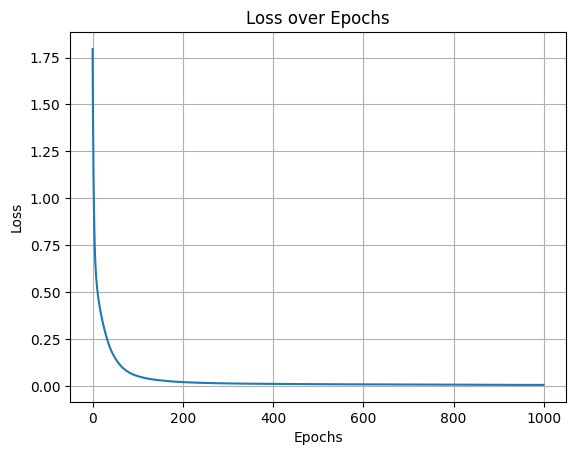

In [9]:
# plotting the loss curve

plt.plot(nn.losses)
plt.title("Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.show()